In [1]:
import numpy as np 
import pandas as pd

In [2]:
csvfile = 'C:/Users/srijal/Desktop/Kagle CSV/dataset_attack.csv'

In [3]:
concat_df = pd.concat(map(pd.read_csv, ['C:/Users/srijal/Desktop/Kagle CSV/dataset_attack.csv',
                                       'C:/Users/srijal/Desktop/Kagle CSV/dataset_normal.csv']))
concat_df.dataframName = 'newcsvfile.csv'

In [4]:
nRow, nCol = concat_df.shape
print(f' There are {nRow} rows and {nCol} columns')

 There are 5658998 rows and 29 columns


In [5]:
concat_df.info() #See weather it did concat or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658998 entries, 1 to 1
Data columns (total 29 columns):
 #   Column            Dtype  
---  ------            -----  
 0   frame.encap_type  int64  
 1   frame.len         object 
 2   frame.protocols   int64  
 3   ip.hdr_len        int64  
 4   ip.len            int64  
 5   ip.flags.rb       int64  
 6   ip.flags.df       int64  
 7   p.flags.mf        int64  
 8   ip.frag_offset    int64  
 9   ip.ttl            int64  
 10  ip.proto          object 
 11  ip.src            object 
 12  ip.dst            int64  
 13  tcp.srcport       int64  
 14  tcp.dstport       int64  
 15  tcp.len           int64  
 16  tcp.ack           int64  
 17  tcp.flags.res     int64  
 18  tcp.flags.ns      int64  
 19  tcp.flags.cwr     int64  
 20  tcp.flags.ecn     int64  
 21  tcp.flags.urg     int64  
 22  tcp.flags.ack     int64  
 23  tcp.flags.push    int64  
 24  tcp.flags.reset   int64  
 25  tcp.flags.syn     int64  
 26  tcp.flags.fin     in

In [6]:
concat_df.head() #see the head

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
1,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.0,attack
1,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.0,attack
1,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.0,attack
1,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.0,attack
1,62,eth:ethertype:ip:udp:data,20,48,0,0,0,0,128,17,...,0,0,0,0,0,0,0,0,0.0,attack


In [7]:
concat_df['tcp.time_delta'].unique() #see how many unique attributes are ther in tcp.time_delta

array(['attack', 'normal'], dtype=object)

In [8]:
concat_df = concat_df.assign( yfeature = lambda dataframe:
                          dataframe['tcp.time_delta'].
                          map(lambda val: 'ATTACK' if val == 'attack' 
                              else 'NORMAL') 
  )

In [9]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [10]:
allnum_df=handle_non_numerical_data(concat_df)
allnum_df.info()
allnum_df.nunique(axis=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658998 entries, 1 to 1
Data columns (total 30 columns):
 #   Column            Dtype  
---  ------            -----  
 0   frame.encap_type  int64  
 1   frame.len         int64  
 2   frame.protocols   int64  
 3   ip.hdr_len        int64  
 4   ip.len            int64  
 5   ip.flags.rb       int64  
 6   ip.flags.df       int64  
 7   p.flags.mf        int64  
 8   ip.frag_offset    int64  
 9   ip.ttl            int64  
 10  ip.proto          int64  
 11  ip.src            int64  
 12  ip.dst            int64  
 13  tcp.srcport       int64  
 14  tcp.dstport       int64  
 15  tcp.len           int64  
 16  tcp.ack           int64  
 17  tcp.flags.res     int64  
 18  tcp.flags.ns      int64  
 19  tcp.flags.cwr     int64  
 20  tcp.flags.ecn     int64  
 21  tcp.flags.urg     int64  
 22  tcp.flags.ack     int64  
 23  tcp.flags.push    int64  
 24  tcp.flags.reset   int64  
 25  tcp.flags.syn     int64  
 26  tcp.flags.fin     in

frame.encap_type      1455
frame.len              450
frame.protocols          3
ip.hdr_len            1463
ip.len                   1
ip.flags.rb              2
ip.flags.df              2
p.flags.mf               5
ip.frag_offset         113
ip.ttl                   5
ip.proto              6479
ip.src               10500
ip.dst               10897
tcp.srcport          11179
tcp.dstport           1461
tcp.len             851063
tcp.ack                  2
tcp.flags.res            2
tcp.flags.ns             2
tcp.flags.cwr            2
tcp.flags.ecn            1
tcp.flags.urg            2
tcp.flags.ack            2
tcp.flags.push           2
tcp.flags.reset          2
tcp.flags.syn            2
tcp.flags.fin        18953
tcp.window_size     450604
tcp.time_delta           2
yfeature                 2
dtype: int64

In [11]:
allnum_df.drop('tcp.time_delta', inplace=True, axis=1)

In [12]:
allnum_df

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,yfeature
1,212,300,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,300,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,300,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,300,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,62,300,20,48,0,0,0,0,128,17,...,0,0,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,60,336,20,40,0,1,0,0,128,6,...,0,0,1,0,0,0,0,16560,0.001240,1
1,1434,336,20,1420,0,1,0,0,113,6,...,0,0,1,0,0,0,0,65019,0.002506,1
1,60,336,20,40,0,1,0,0,128,6,...,0,0,1,0,0,0,0,16560,0.001244,1
1,1434,336,20,1420,0,1,0,0,113,6,...,0,0,1,0,0,0,0,65019,0.002505,1


In [13]:
#Split the data into independent features and target.

X = allnum_df.drop(['yfeature'],axis=1)
 
y = allnum_df.yfeature.values

In [14]:
#Then Standardize the features by using StandardScaler from scikit-learn.
from sklearn.preprocessing import StandardScaler 

X_scaled = StandardScaler().fit_transform(X)

In [15]:
#Split the data into train and validate sets. 20% of the data will be used for validation.
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [16]:
#Random Forest with 29columns

from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score

model_rfc1 = RandomForestClassifier()
model_rfc1.fit(X_train,y_train)

preds_rfc1 = model_rfc1.predict(X_valid)
accuracy_score(preds_rfc1, y_valid)

0.9953419332037462

In [23]:
#creating a confussion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(preds_rfc1, y_valid)

tn,fp,fn,tp = confusion_matrix(preds_rfc1, y_valid).ravel()
(tn,fp,fn,tp)


(593844, 1103, 4169, 532684)

In [24]:
# import packages start featurewiz 
import seaborn as sns
np.random.seed(1234)

In [25]:
from featurewiz import featurewiz

In [26]:
allnum_df

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,yfeature
1,212,300,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,300,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,300,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,300,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,62,300,20,48,0,0,0,0,128,17,...,0,0,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,60,336,20,40,0,1,0,0,128,6,...,0,0,1,0,0,0,0,16560,0.001240,1
1,1434,336,20,1420,0,1,0,0,113,6,...,0,0,1,0,0,0,0,65019,0.002506,1
1,60,336,20,40,0,1,0,0,128,6,...,0,0,1,0,0,0,0,16560,0.001244,1
1,1434,336,20,1420,0,1,0,0,113,6,...,0,0,1,0,0,0,0,65019,0.002505,1


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (5658998, 29)
    Caution: We will try to reduce the memory usage of dataframe from 1295.24 MB
        memory usage after optimization is: 334.60 MB
        decreased by 74.2%
    Loaded train data. Shape = (5658998, 29)
 setting a hard limit of 900K samples for train since some it is huge and breaks pandas...
    Some column names had special characters which were removed...

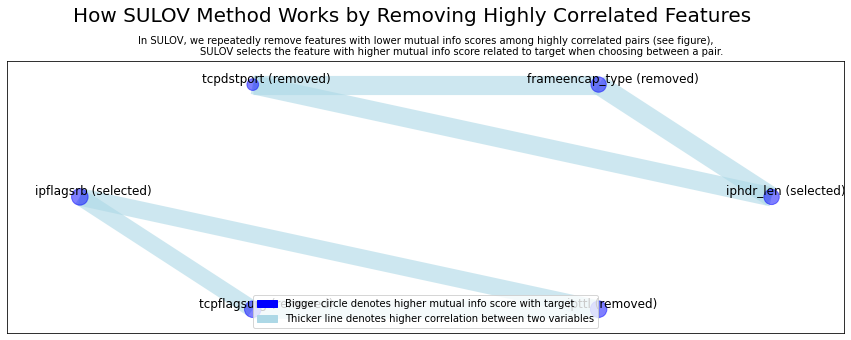

Time taken for SULOV method = 51 seconds
    Adding 0 categorical variables to reduced numeric variables  of 16
Final list of selected vars after SULOV = 16
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 16 
    XGBoost version: 1.6.1
Number of booster rounds = 20
        using 16 variables...
            Time taken for regular XGBoost feature selection = 7 seconds
        using 13 variables...
            Time taken for regular XGBoost feature selection = 14 seconds
        using 10 variables...
            Time taken for regular XGBoost feature selectio

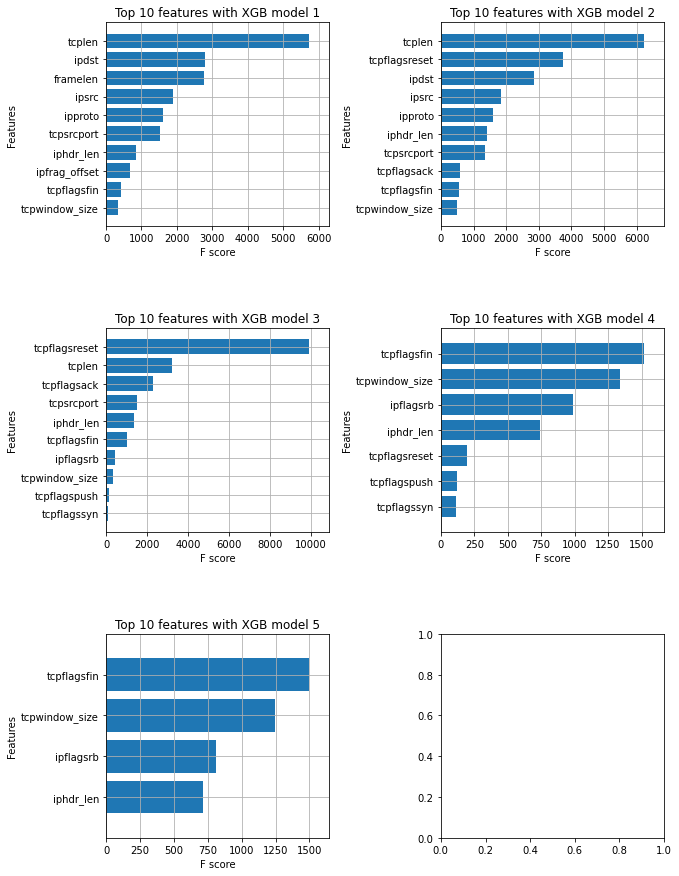

            Total time taken for XGBoost feature selection = 26 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 15 important features:
['tcplen', 'ipdst', 'framelen', 'ipsrc', 'ipproto', 'tcpsrcport', 'iphdr_len', 'ipfrag_offset', 'tcpflagsfin', 'tcpwindow_size', 'tcpflagsreset', 'tcpflagsack', 'ipflagsrb', 'tcpflagspush', 'tcpflagssyn']

    Time taken for feature selection = 78 seconds
Returning 2 dataframes: dataname and test_data with 15 important features.


In [27]:
# automatic feature selection by using featurewiz package
target = 'yfeature'
 
features, train = featurewiz(allnum_df, target, corr_limit=0.6, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [28]:
print(features)

['tcp.len', 'ip.dst', 'frame.len', 'ip.src', 'ip.proto', 'tcp.srcport', 'ip.hdr_len', 'ip.frag_offset', 'tcp.flags.fin', 'tcp.window_size', 'tcp.flags.reset', 'tcp.flags.ack', 'ip.flags.rb', 'tcp.flags.push', 'tcp.flags.syn']


In [29]:
#split data into feature and target

X_new = train.drop(['yfeature'],axis=1)
 
y = train.yfeature.values

In [30]:
# preprocessing the features

X_scaled =  StandardScaler().fit_transform(X_new)

In [31]:
#split data into train and validate 
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [32]:
#KNN with featurewiz 

from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)

preds_rfc = model_rfc.predict(X_valid)
accuracy_score(preds_rfc, y_valid)

0.9932444444444445

In [33]:
#creating a confussion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(preds_rfc, y_valid)

tn,fp,fn,tp = confusion_matrix(preds_rfc, y_valid).ravel()
(tn,fp,fn,tp)

(94146, 311, 905, 84638)